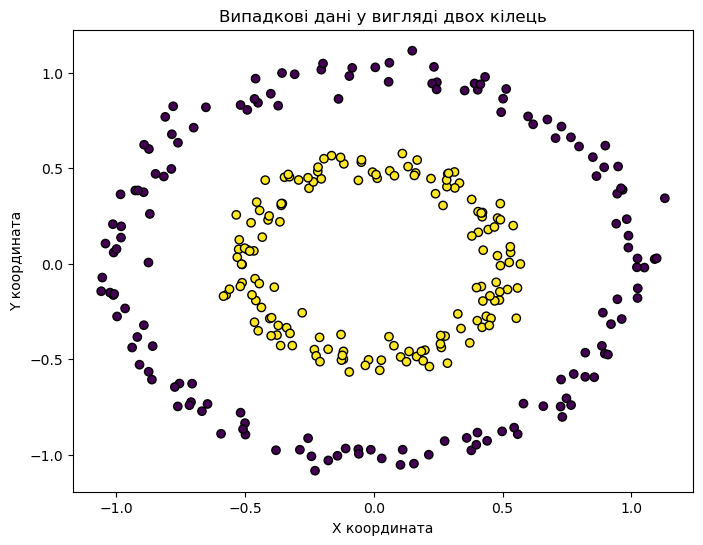

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Генерація випадкових даних у вигляді двох кілець
X, y = make_circles(n_samples=300, factor=.5, noise=.05)

# Візуалізація згенерованих даних
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.title("Випадкові дані у вигляді двох кілець")
plt.xlabel("X координата")
plt.ylabel("Y координата")
plt.show()


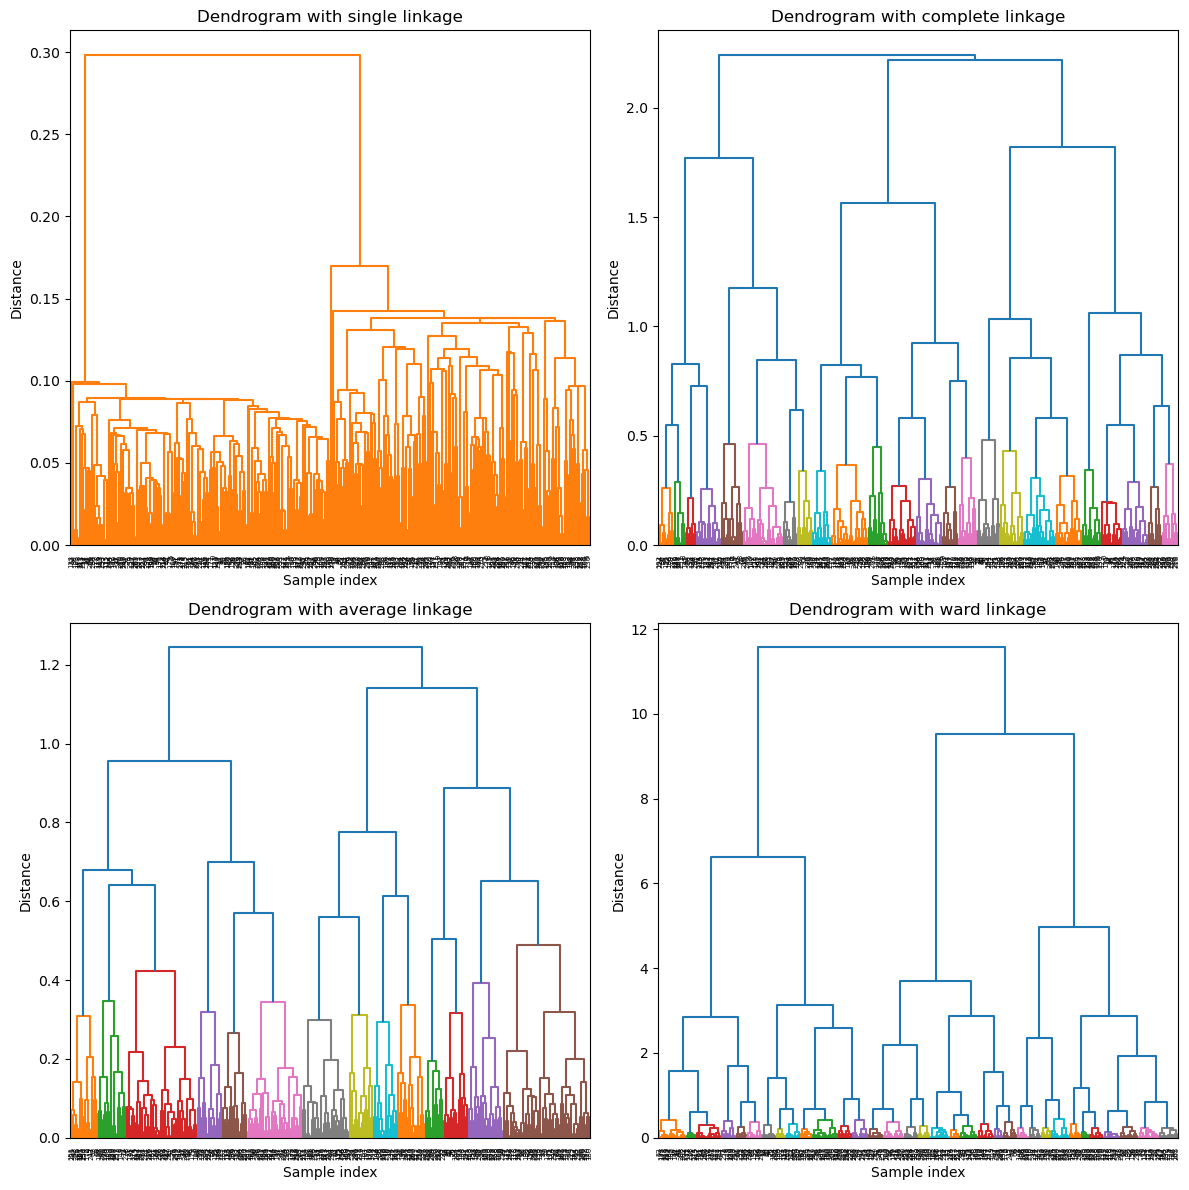

In [2]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Визначаємо методи зв'язку для ієрархічної кластеризації
linkage_methods = ['single', 'complete', 'average', 'ward']

# Створюємо фігуру для візуалізації
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
axes = axes.flatten()

# Виконуємо кластеризацію та візуалізацію дендрограм для кожного методу
for i, method in enumerate(linkage_methods):
    Z = linkage(X, method=method)
    dendrogram(Z, ax=axes[i], color_threshold=0.5)
    axes[i].set_title(f"Dendrogram with {method} linkage")
    axes[i].set_xlabel("Sample index")
    axes[i].set_ylabel("Distance")

fig.tight_layout()
plt.show()


C:\Users\Roma\AppData\Local\Temp\ipykernel_16092\1143234803.py:9: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv(data_path, sep=';', parse_dates=[[0, 1]], infer_datetime_format=True,
C:\Users\Roma\AppData\Local\Temp\ipykernel_16092\1143234803.py:9: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv(data_path, sep=';', parse_dates=[[0, 1]], infer_datetime_format=True,
C:\Users\Roma\AppData\Local\Temp\ipykernel_16092\1143234803.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


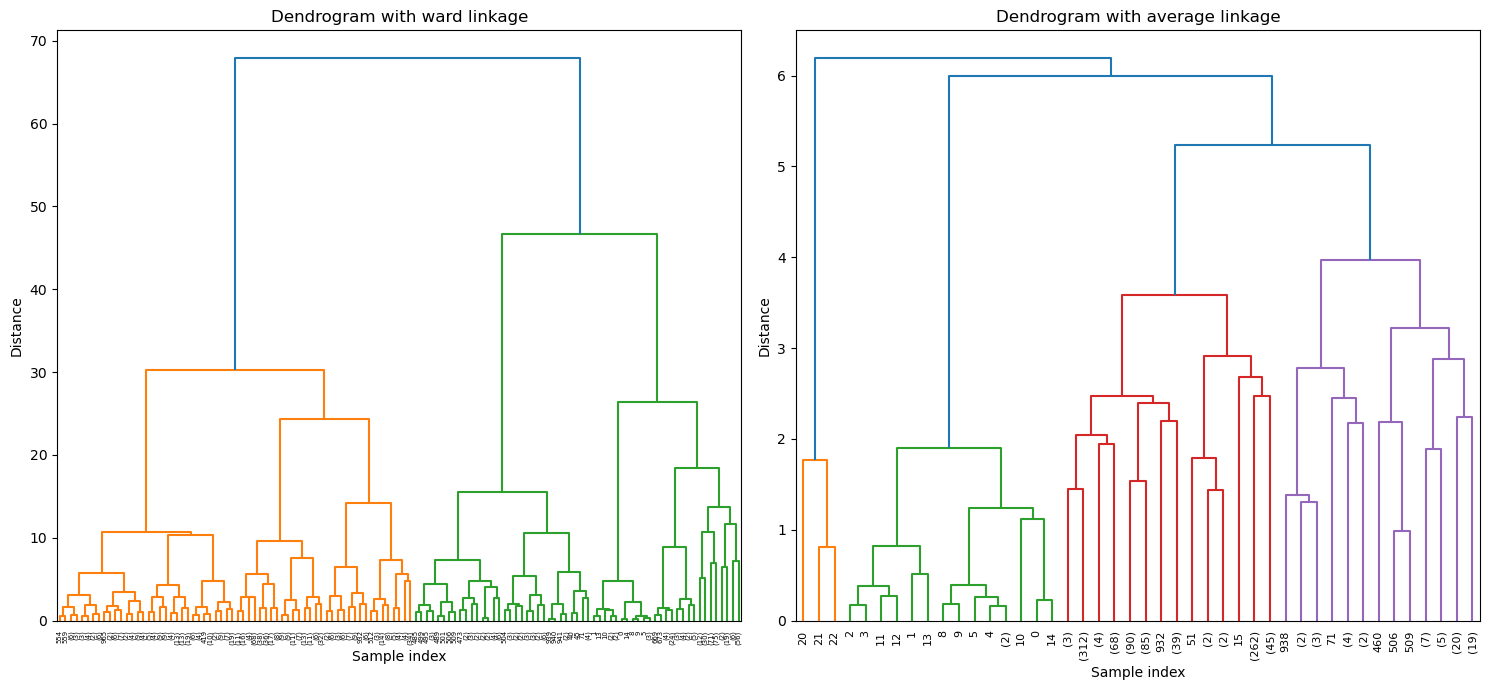

In [6]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Завантаження даних
data_path = 'household_power_consumption.csv'
data = pd.read_csv(data_path, sep=';', parse_dates=[[0, 1]], infer_datetime_format=True, 
                   low_memory=False, na_values='?', nrows=1000) \

# Перевірка на пропущені значення та їх обробка
data.fillna(method='ffill', inplace=True)

# Вибірка числових колонок для кластеризації
numeric_data = data.select_dtypes(include=[np.number])

# Зміна типу даних
numeric_data = numeric_data.astype(np.float32)

# Стандартизація даних
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_data)

# Ієрархічна кластеризація з обмеженою кількістю записів
linkage_methods = ['ward', 'average']  # використовуємо 'ward' і 'average', які ефективні
linkage_matrices = {method: linkage(numeric_scaled, method=method) for method in linkage_methods}

# Візуалізація дендрограм (за потребою та здатністю виконувати це локально)
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes = axes.flatten()
for i, method in enumerate(linkage_methods):
    dendrogram(linkage_matrices[method], ax=axes[i], truncate_mode='level', p=6)
    axes[i].set_title(f'Dendrogram with {method} linkage')
    axes[i].set_xlabel('Sample index')
    axes[i].set_ylabel('Distance')

plt.tight_layout()
plt.show()


In [7]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Стандартизація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_data)  # numeric_data має бути вашими підготовленими числовими даними

# DBSCAN кластеризація
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

# Аналіз результатів
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
percentage_noise = n_noise / len(clusters) * 100

print(f"Кількість кластерів: {n_clusters}")
print(f"Відсоток некластеризованих спостережень: {percentage_noise:.2f}%")


Кількість кластерів: 13
Відсоток некластеризованих спостережень: 14.70%


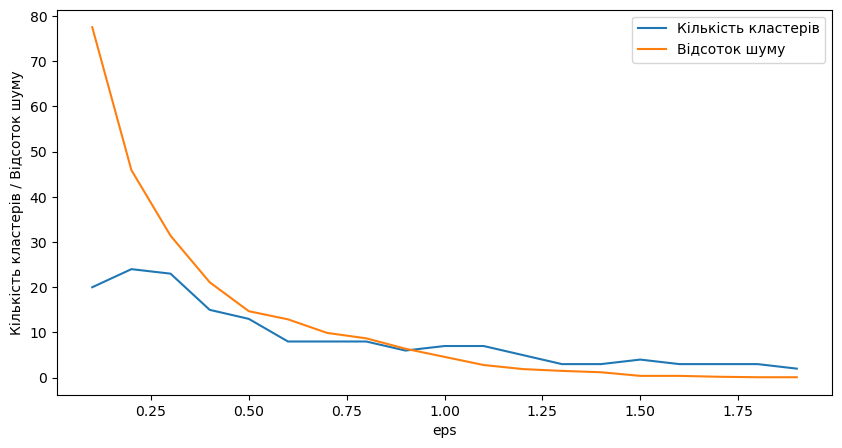

In [8]:
import matplotlib.pyplot as plt

# Залежність від eps
eps_values = np.arange(0.1, 2.0, 0.1)
n_clusters = []
percentages_noise = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    clusters = dbscan.fit_predict(X_scaled)
    n_clusters.append(len(set(clusters)) - (1 if -1 in clusters else 0))
    percentages_noise.append(list(clusters).count(-1) / len(clusters) * 100)

plt.figure(figsize=(10, 5))
plt.plot(eps_values, n_clusters, label='Кількість кластерів')
plt.plot(eps_values, percentages_noise, label='Відсоток шуму')
plt.xlabel('eps')
plt.ylabel('Кількість кластерів / Відсоток шуму')
plt.legend()
plt.show()


Optimal eps value: 0.9


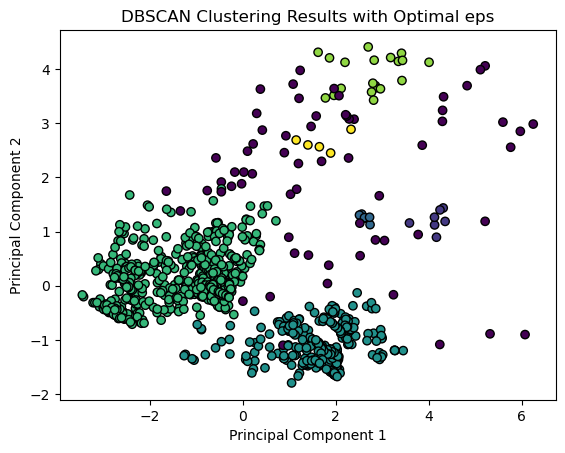

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Припустимо, що X_scaled - це ваш стандартизований датасет
# Досліджуємо eps
eps_values = np.arange(0.1, 2.0, 0.1)
optimal_eps = None

for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    clusters = dbscan.fit_predict(X_scaled)
    unique_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    noise_percent = list(clusters).count(-1) / len(clusters) * 100

    # Запам'ятовуємо перше eps, що відповідає умовам
    if 5 <= unique_clusters <= 7 and noise_percent <= 12:
        optimal_eps = eps
        break

print(f"Optimal eps value: {optimal_eps}")

# Виконання кластеризації з оптимальним eps
if optimal_eps is not None:
    dbscan = DBSCAN(eps=optimal_eps)
    clusters = dbscan.fit_predict(X_scaled)

    # Зменшення розмірності для візуалізації
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('DBSCAN Clustering Results with Optimal eps')
    plt.show()
else:
    print("No optimal eps found within the specified range and conditions.")

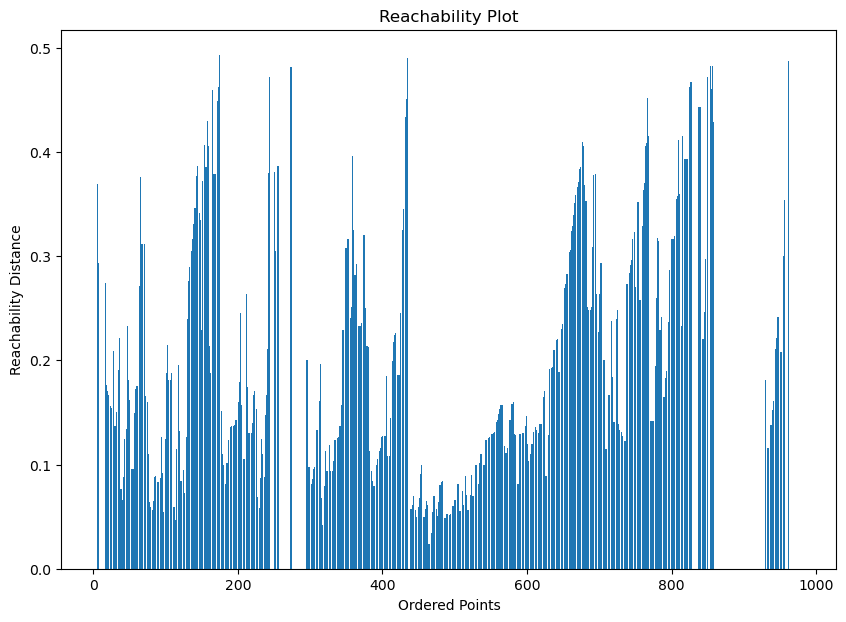

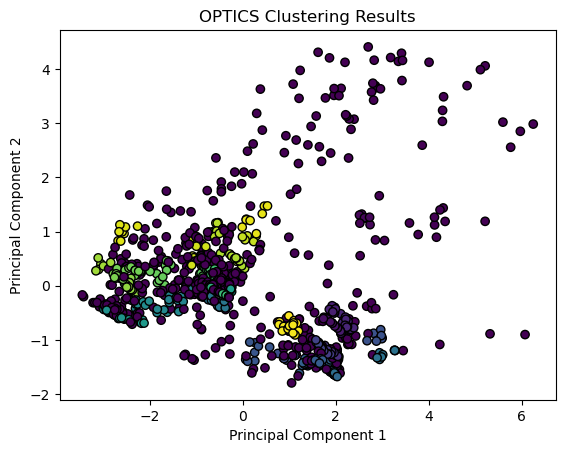

In [13]:
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

optimal_eps = 0.5
optimal_min_samples = 5  

# Запуск OPTICS
optics = OPTICS(min_samples=optimal_min_samples, max_eps=optimal_eps, metric='minkowski')
optics.fit(X_scaled)

# Графік досяжності
space = np.arange(len(X_scaled))
reachability = optics.reachability_[optics.ordering_]
plt.figure(figsize=(10, 7))
plt.bar(space, reachability)
plt.title('Reachability Plot')
plt.xlabel('Ordered Points')
plt.ylabel('Reachability Distance')
plt.show()

# Візуалізація результатів кластеризації
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
labels = optics.labels_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('OPTICS Clustering Results')
plt.show()